In [ ]:
#How inverse differencing actually works:
#https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/

#OR:

#https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/


#How inverse scaling actually works: https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/

#OR:

#https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

invert_scale actually inverts, the scaling we have done on the data by: by scikitlearn - 

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train),

inverse_difference actually inverts the difference of time series while performing stationary-isng it.

But why we need the forcased value to be invert back to the original time seires values?

Actually we have fed the test_scaled data in the: forecast_lstm(lstm_model, 1, X) function, 

which actually takes the data in the form of scaled, differenced form already, so it is producing;

the prediction in the form of scaled and differenced format, we need to put it back or invert it;

back to the non differenced and non scaled format inorder to calculate mse. otehrwise mse cannot be calculated.


In [72]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta

# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
import seaborn as sns
import numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Using TensorFlow backend.
/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yogender

In [2]:
# load the data using pandas build in read csv function
df_city_time_series = pd.read_csv('./City_time_series.csv',parse_dates=['Date'])
# drop null values in ZHVIPerSqft_AllHomes because we are interested in this column
df_city_time_series

,Date,RegionName,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,44700.0,44700.0,74500.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,87400.0,131000.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,abilenetaylortx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,NaN,23.0,26.0,NaN,NaN,NaN,NaN,NaN,...,152600.0,NaN,228500.0,228600.0,428100.0,1326.0,1321.0,0.844,NaN,1322.0
4172717,2017-08-31,zolfo_springshardeefl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,67700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4172718,2017-08-31,zumbro_fallswabashamn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,154100.0,NaN,278600.0,278600.0,NaN,NaN,NaN,NaN,NaN,NaN
4172719,2017-08-31,zumbrotagoodhuemn,NaN,17.0,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1341.0,1339.0,1.082,NaN,1340.0


In [3]:
df_city_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4172721 entries, 0 to 4172720
Data columns (total 85 columns):
Date                                                             datetime64[ns]
RegionName                                                       object
HomesSoldAsForeclosuresRatio_AllHomes                            float64
InventorySeasonallyAdjusted_AllHomes                             float64
InventoryRaw_AllHomes                                            float64
MedianListingPricePerSqft_1Bedroom                               float64
MedianListingPricePerSqft_2Bedroom                               float64
MedianListingPricePerSqft_3Bedroom                               float64
MedianListingPricePerSqft_4Bedroom                               float64
MedianListingPricePerSqft_5BedroomOrMore                         float64
MedianListingPricePerSqft_AllHomes                               float64
MedianListingPricePerSqft_CondoCoop                              float64
Media

Function to see what percentage are are null

In [4]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    

In [5]:
missing_values_table(df_city_time_series)

Your selected dataframe has 85 columns.
There are 83 columns that have missing values.


,Missing Values,% of Total Values
MedianRentalPrice_5BedroomOrMore,4171636,100.0
MedianRentalPricePerSqft_5BedroomOrMore,4171619,100.0
MedianRentalPricePerSqft_Studio,4171128,100.0
MedianRentalPrice_Studio,4171096,100.0
MedianListingPrice_1Bedroom,4165815,99.8
...,...,...
ZHVI_SingleFamilyResidence,1594824,38.2
ZHVI_MiddleTier,1592120,38.2
ZHVI_AllHomes,1588090,38.1
ZHVI_TopTier,1558122,37.3


In [6]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df_city_time_series);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 85 columns.
There are 83 columns that have missing values.
We will remove 75 columns.


In [7]:
# Drop the columns
data = df_city_time_series.drop(columns = list(missing_columns))

In [8]:
data

,Date,RegionName,ZHVIPerSqft_AllHomes,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#missing_df.filter(like='ZHVIPerSqft_AllHomes', axis=0)

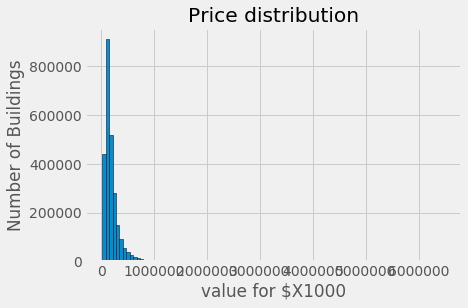

In [9]:

#figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ZHVIPerSqft_AllHomes': 'value for $X1000'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['ZHVI_AllHomes'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('value for $X1000'); plt.ylabel('Number of Buildings'); ""
plt.title('Price distribution');

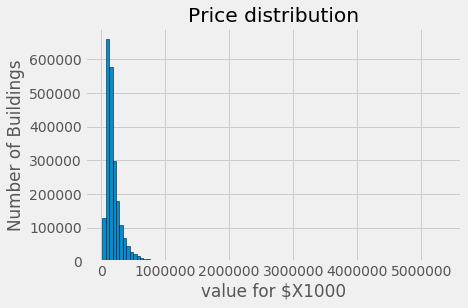

In [10]:
#figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ZHVIPerSqft_AllHomes': 'value for $X1000'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['ZHVI_3bedroom'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('value for $X1000'); plt.ylabel('Number of Buildings'); 
plt.title('Price distribution');

In [11]:
data_mean = pd.DataFrame(data.groupby(['Date'])['value for $X1000'].mean())

In [12]:
data_mean

,value for $X1000
Date,
1996-04-30,73.161358
1996-05-31,73.114557
1996-06-30,73.079675
1996-07-31,73.083414
1996-08-31,73.073895
...,...
2017-04-30,148.888993
2017-05-31,149.470273
2017-06-30,150.011101


In [16]:
data['weekend'] = ((data.Date.dt.dayofweek) // 5 == 1).astype(float)

In [17]:
data['weekday'] = data['Date'].apply(lambda x: x.weekday())

In [18]:
data

,Date,RegionName,value for $X1000,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,year,month,day,month_num,weekend,weekday
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,1996,4,30,4,0.0,1
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0,1996,4,30,4,0.0,1
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0,1996,4,30,4,0.0,1
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0,1996,4,30,4,0.0,1
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN,1996,4,30,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0,2017,8,31,8,0.0,3
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN,2017,8,31,8,0.0,3
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN,2017,8,31,8,0.0,3
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,31,8,0.0,3


In [19]:
# Feature engineering with the date
data['year']=data.Date.dt.year 
data['month']=data.Date.dt.month 
data['day']=data.Date.dt.day

In [20]:
data

,Date,RegionName,value for $X1000,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,year,month,day,month_num,weekend,weekday
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,1996,4,30,4,0.0,1
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0,1996,4,30,4,0.0,1
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0,1996,4,30,4,0.0,1
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0,1996,4,30,4,0.0,1
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN,1996,4,30,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0,2017,8,31,8,0.0,3
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN,2017,8,31,8,0.0,3
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN,2017,8,31,8,0.0,3
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,31,8,0.0,3


In [21]:
# For the next graphics
data['month_num'] = data['month']
data['month'].replace('11','11 - November',inplace=True)
data['month'].replace('12','12 - December',inplace=True)

data['weekday_num'] = data['weekday']
data['weekday'].replace(0,'01 - Monday',inplace=True)
data['weekday'].replace(1,'02 - Tuesday',inplace=True)
data['weekday'].replace(2,'03 - Wednesday',inplace=True)
data['weekday'].replace(3,'04 - Thursday',inplace=True)
data['weekday'].replace(4,'05 - Friday',inplace=True)
data['weekday'].replace(5,'06 - Saturday',inplace=True)
data['weekday'].replace(6,'07 - Sunday',inplace=True)

In [22]:
data

,Date,RegionName,value for $X1000,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,year,month,day,month_num,weekend,weekday,weekday_num
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,1996,4,30,4,0.0,02 - Tuesday,1
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0,1996,4,30,4,0.0,02 - Tuesday,1
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0,1996,4,30,4,0.0,02 - Tuesday,1
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0,1996,4,30,4,0.0,02 - Tuesday,1
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN,1996,4,30,4,0.0,02 - Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0,2017,8,31,8,0.0,04 - Thursday,3
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3


In [23]:
data.columns

Index(['Date', 'RegionName', 'value for $X1000', 'Turnover_AllHomes',
       'ZHVI_3bedroom', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_MiddleTier',
       'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier', 'year', 'month', 'day',
       'month_num', 'weekend', 'weekday', 'weekday_num'],
      dtype='object')

In [ ]:

# Histogram Plot of Site EUI
#figsize(8, 8)
#plt.hist(data.drop(columns = ['Date','RegionName'] ).dropna(), bins = 20, edgecolor = 'black');
#plt.xlabel('Site EUI'); 
#plt.ylabel('Count'); plt.title('Site EUI Distribution');

/home/yogender/miniconda3/envs/keras/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


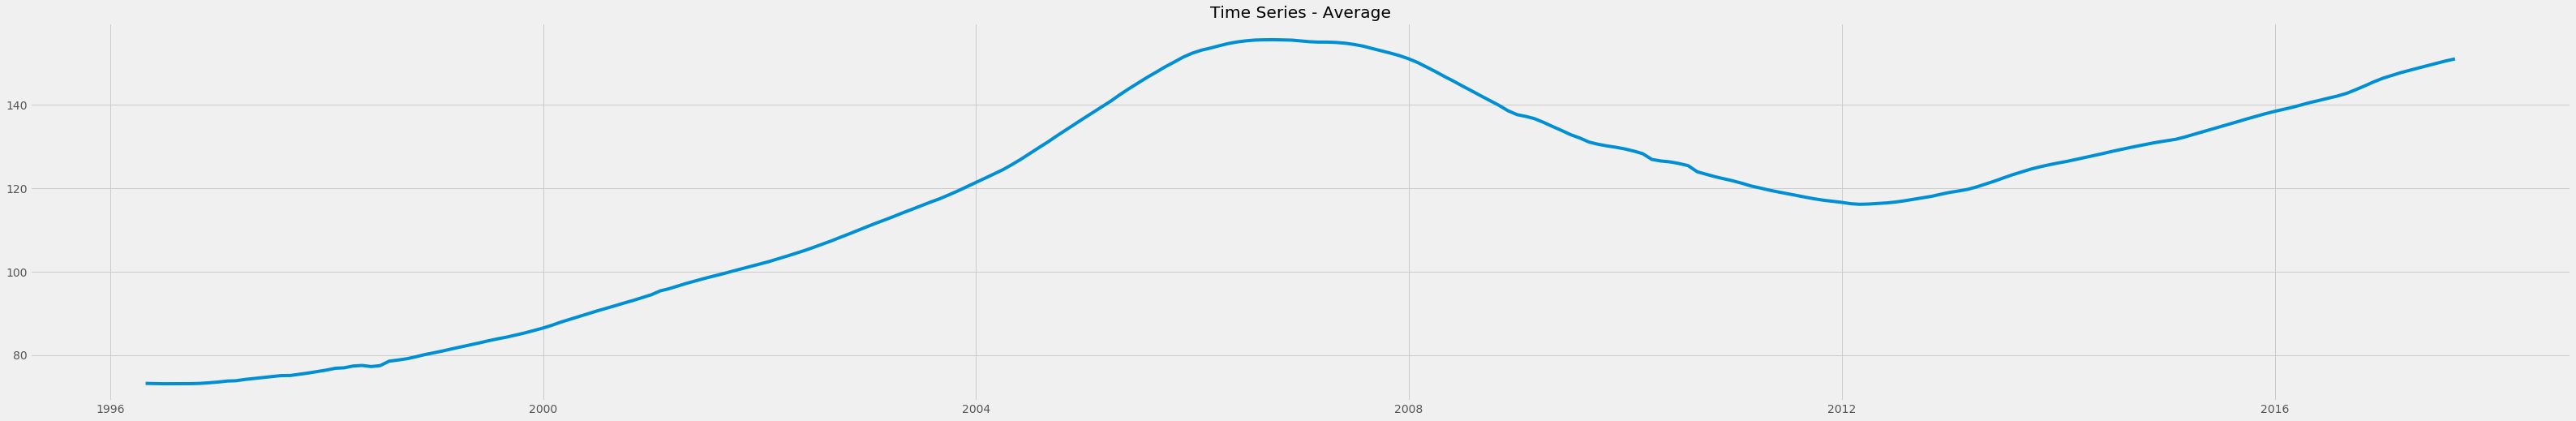

In [24]:
plt.figure(figsize=(50, 8))
mean_group = data[['Date','RegionName', 'value for $X1000']].groupby(['Date'])['value for $X1000'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

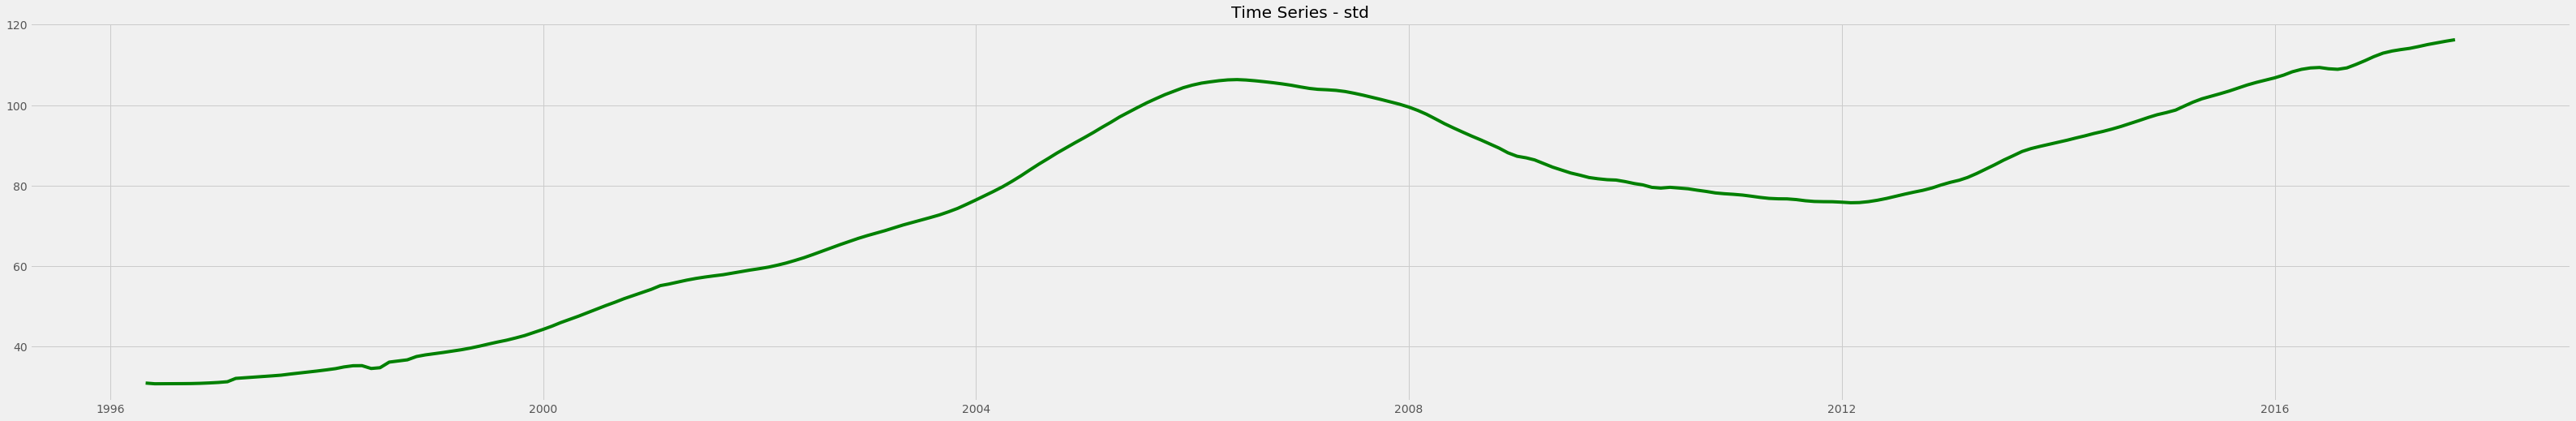

In [25]:
plt.figure(figsize=(50, 8))
std_group = data[['Date','RegionName', 'value for $X1000']].groupby(['Date'])['value for $X1000'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - std')
plt.show()

In [26]:
data

,Date,RegionName,value for $X1000,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,year,month,day,month_num,weekend,weekday,weekday_num
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,1996,4,30,4,0.0,02 - Tuesday,1
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0,1996,4,30,4,0.0,02 - Tuesday,1
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0,1996,4,30,4,0.0,02 - Tuesday,1
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0,1996,4,30,4,0.0,02 - Tuesday,1
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN,1996,4,30,4,0.0,02 - Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0,2017,8,31,8,0.0,04 - Thursday,3
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3


In [27]:
train_group = data.groupby(["month", "weekday"])['value for $X1000'].mean().reset_index()
train_group = train_group.pivot('weekday','month','value for $X1000')
train_group.sort_index(inplace=True)

In [28]:
data_date = data.groupby(["Date"])['value for $X1000'].mean().reset_index()

In [29]:
data_date

,Date,value for $X1000
0,1996-04-30,73.161358
1,1996-05-31,73.114557
2,1996-06-30,73.079675
3,1996-07-31,73.083414
4,1996-08-31,73.073895
...,...,...
252,2017-04-30,148.888993
253,2017-05-31,149.470273
254,2017-06-30,150.011101
255,2017-07-31,150.574882


In [30]:
train_group

month,1,2,3,4,5,6,7,8,9,10,11,12
weekday,,,,,,,,,,,,
01 - Monday,115.954374,133.000098,117.076386,122.928993,112.622675,117.383484,133.528838,116.676105,104.139235,136.996109,117.287415,124.064274
02 - Tuesday,138.455795,130.831235,116.732160,101.609287,134.459474,116.675664,123.429289,113.729634,117.500529,124.906007,115.031138,105.661089
03 - Wednesday,125.996566,122.490348,111.698917,117.179943,132.573458,113.101251,103.067997,135.860878,116.831218,123.814720,137.603904,117.934195
04 - Thursday,124.075180,111.858093,133.477559,116.706335,123.114902,134.927108,117.490478,133.885755,114.145692,104.648552,125.208517,117.482317
05 - Friday,106.142202,116.988548,131.446605,112.120974,102.008535,133.067434,116.671254,123.547594,136.419221,117.633142,123.967409,115.491305
06 - Saturday,118.254804,116.668702,122.705105,133.981313,117.285507,123.273769,113.544223,103.603927,124.618968,117.055228,105.148687,138.115583
07 - Sunday,117.631529,111.557264,112.485304,132.024233,116.714018,102.511553,135.385829,117.374500,123.678226,114.564140,117.743019,125.451428


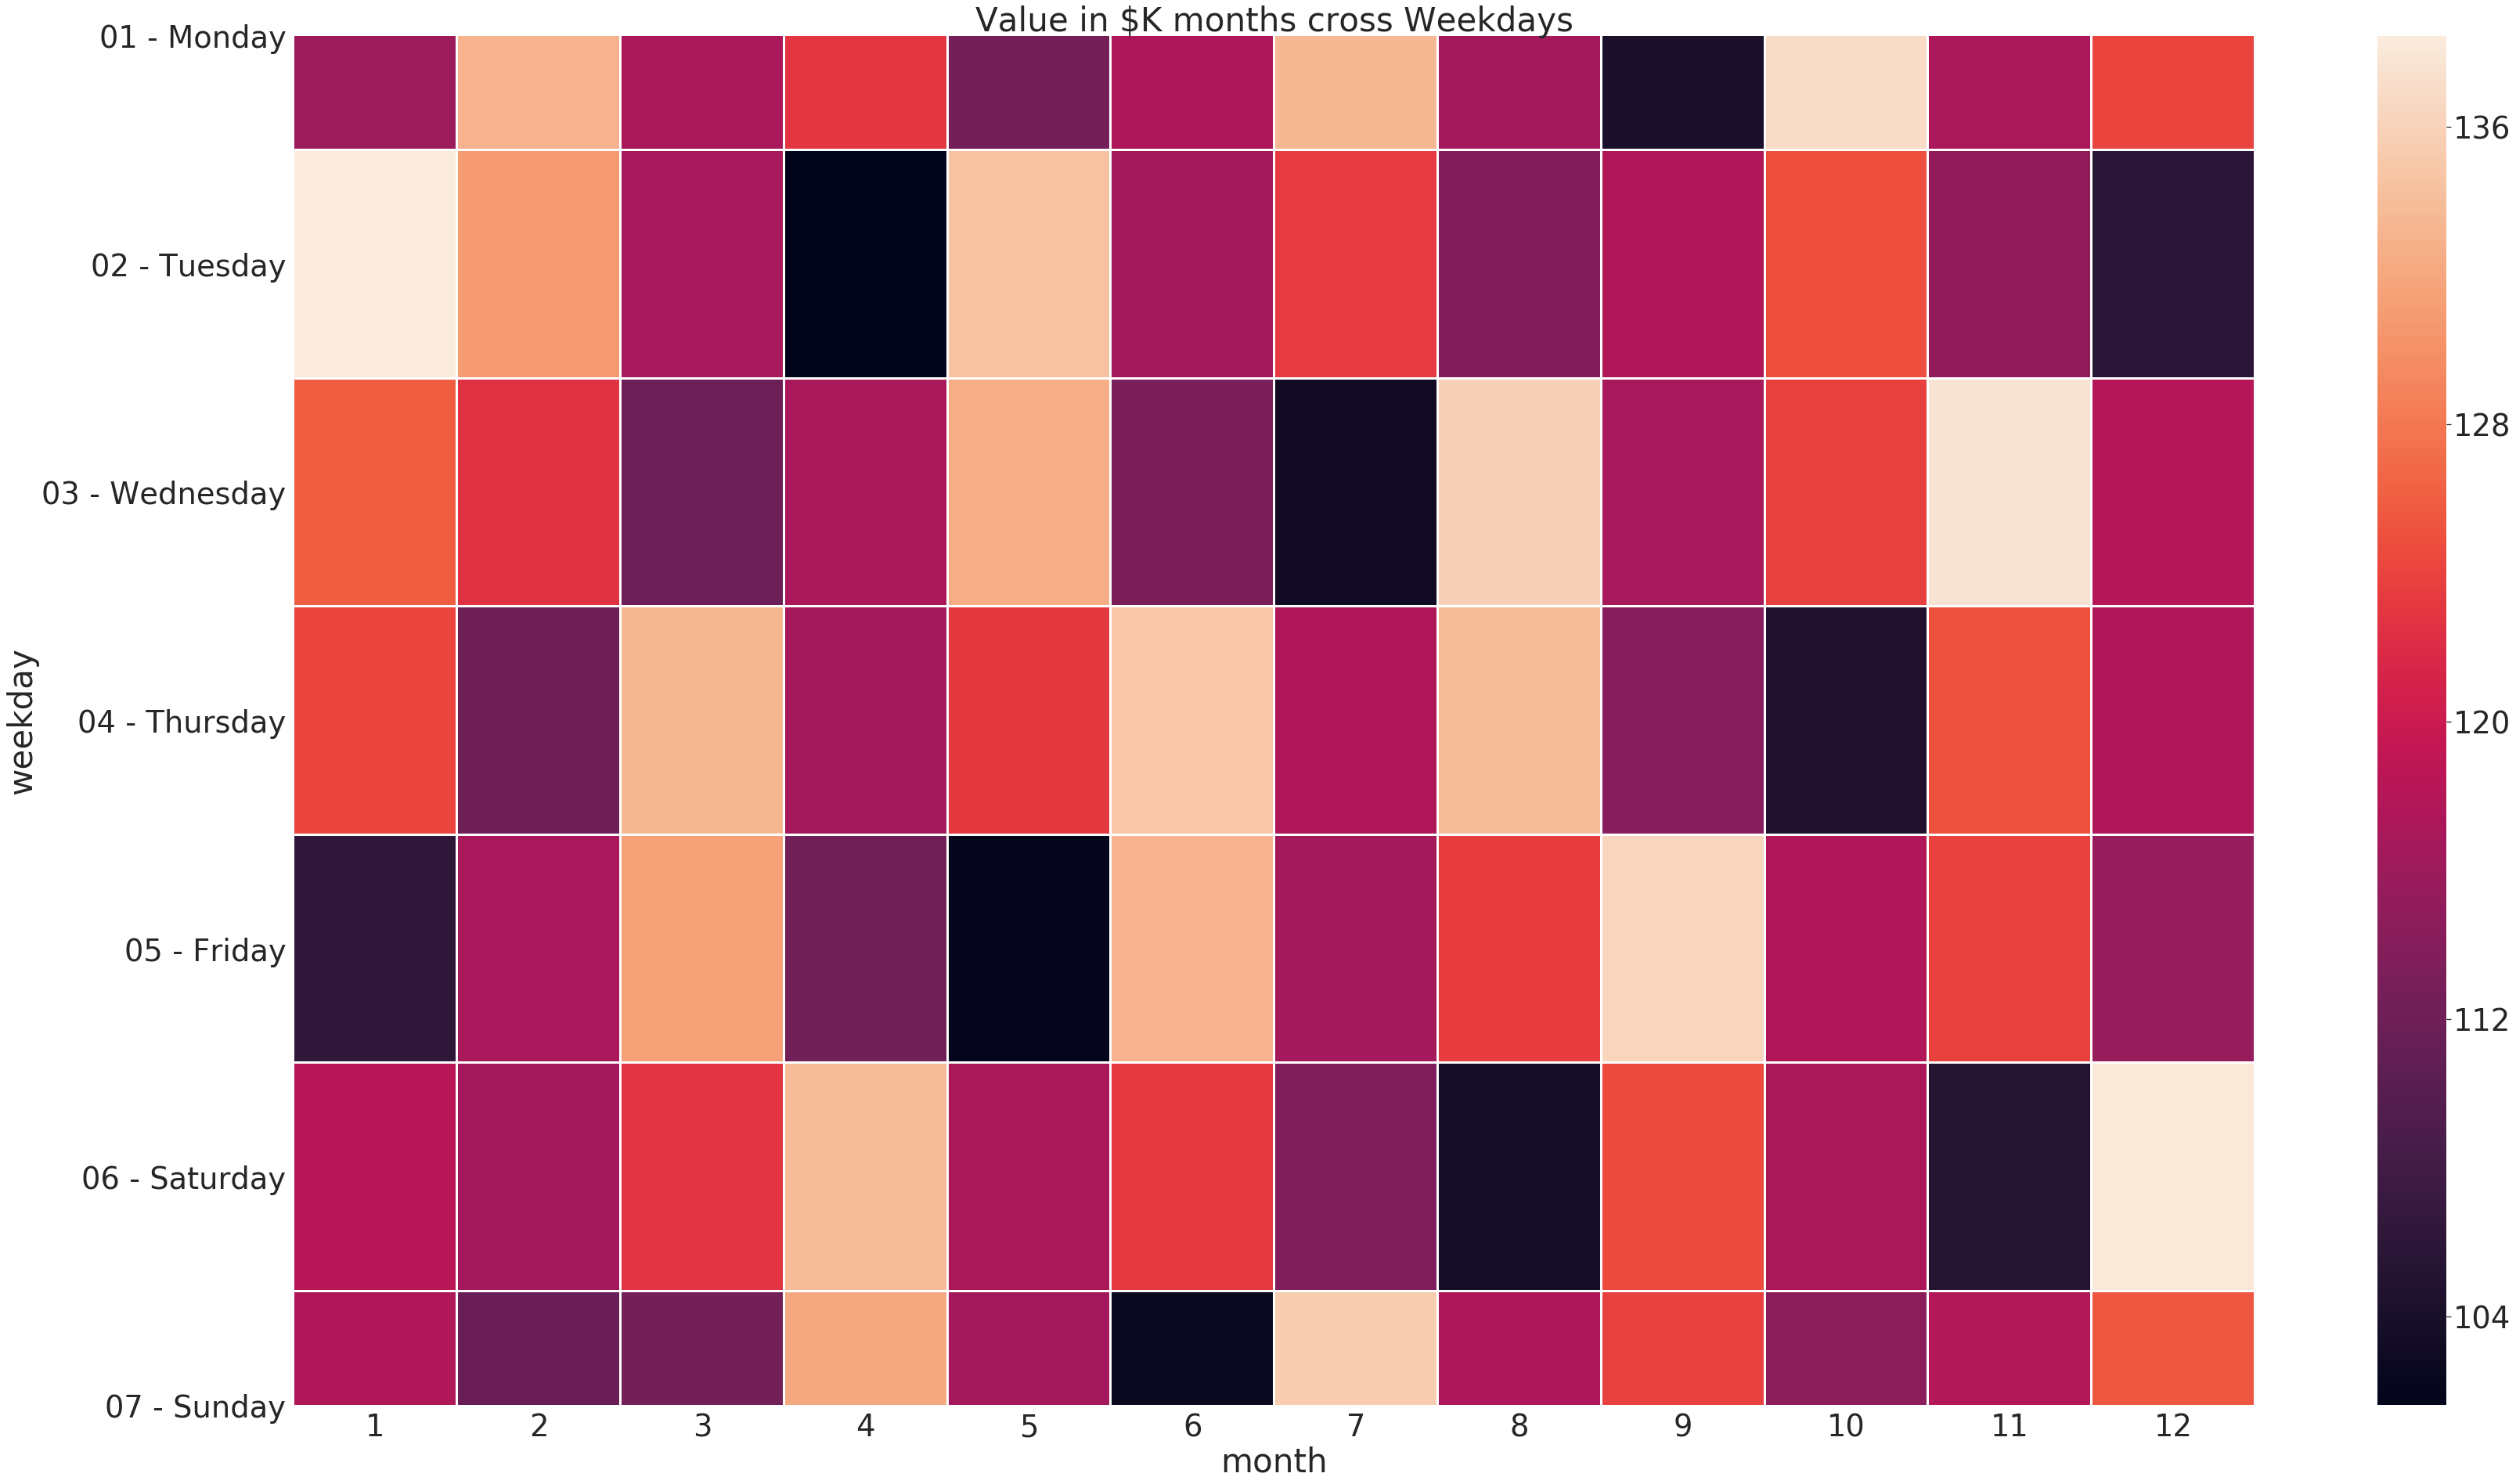

In [31]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Value in $K months cross Weekdays')
plt.show()

In [32]:
data

,Date,RegionName,value for $X1000,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,year,month,day,month_num,weekend,weekday,weekday_num
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,1996,4,30,4,0.0,02 - Tuesday,1
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0,1996,4,30,4,0.0,02 - Tuesday,1
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0,1996,4,30,4,0.0,02 - Tuesday,1
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0,1996,4,30,4,0.0,02 - Tuesday,1
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN,1996,4,30,4,0.0,02 - Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0,2017,8,31,8,0.0,04 - Thursday,3
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3


In [33]:
train_group_year_month = data.groupby(["year", "month"])['value for $X1000'].mean().reset_index()
train_group_year_month = train_group_year_month.pivot('year','month','value for $X1000')
train_group.sort_index(inplace=True)

In [34]:
train_group_year_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1996,NaN,NaN,NaN,73.161358,73.114557,73.079675,73.083414,73.073895,73.103574,73.165718,73.310458,73.491285
1997,73.731024,73.797374,74.110792,74.333984,74.552290,74.781705,75.035579,75.056646,75.358005,75.658281,76.001353,76.355967
1998,76.806125,76.896666,77.331463,77.469725,77.208291,77.421324,78.499836,78.779917,79.100957,79.590070,80.114493,80.539536
1999,81.008232,81.463850,81.938290,82.407111,82.885026,83.383055,83.850944,84.268222,84.754139,85.269404,85.842201,86.430291
2000,87.118134,87.846071,88.528553,89.191156,89.853494,90.526135,91.166005,91.807014,92.448840,93.077828,93.750909,94.435856
2001,95.384807,95.870234,96.545009,97.195675,97.802833,98.386664,98.952711,99.494841,100.079026,100.657413,101.208466,101.782812
2002,102.376835,102.991925,103.648959,104.326856,105.025911,105.769990,106.576404,107.377213,108.230818,109.081170,109.943520,110.827594
2003,111.690792,112.433594,113.279954,114.141244,114.982054,115.820965,116.668320,117.473463,118.375803,119.343793,120.350321,121.376540
2004,122.409603,123.377768,124.435959,125.633417,126.944829,128.326725,129.751521,131.142738,132.599854,134.039089,135.454441,136.860293


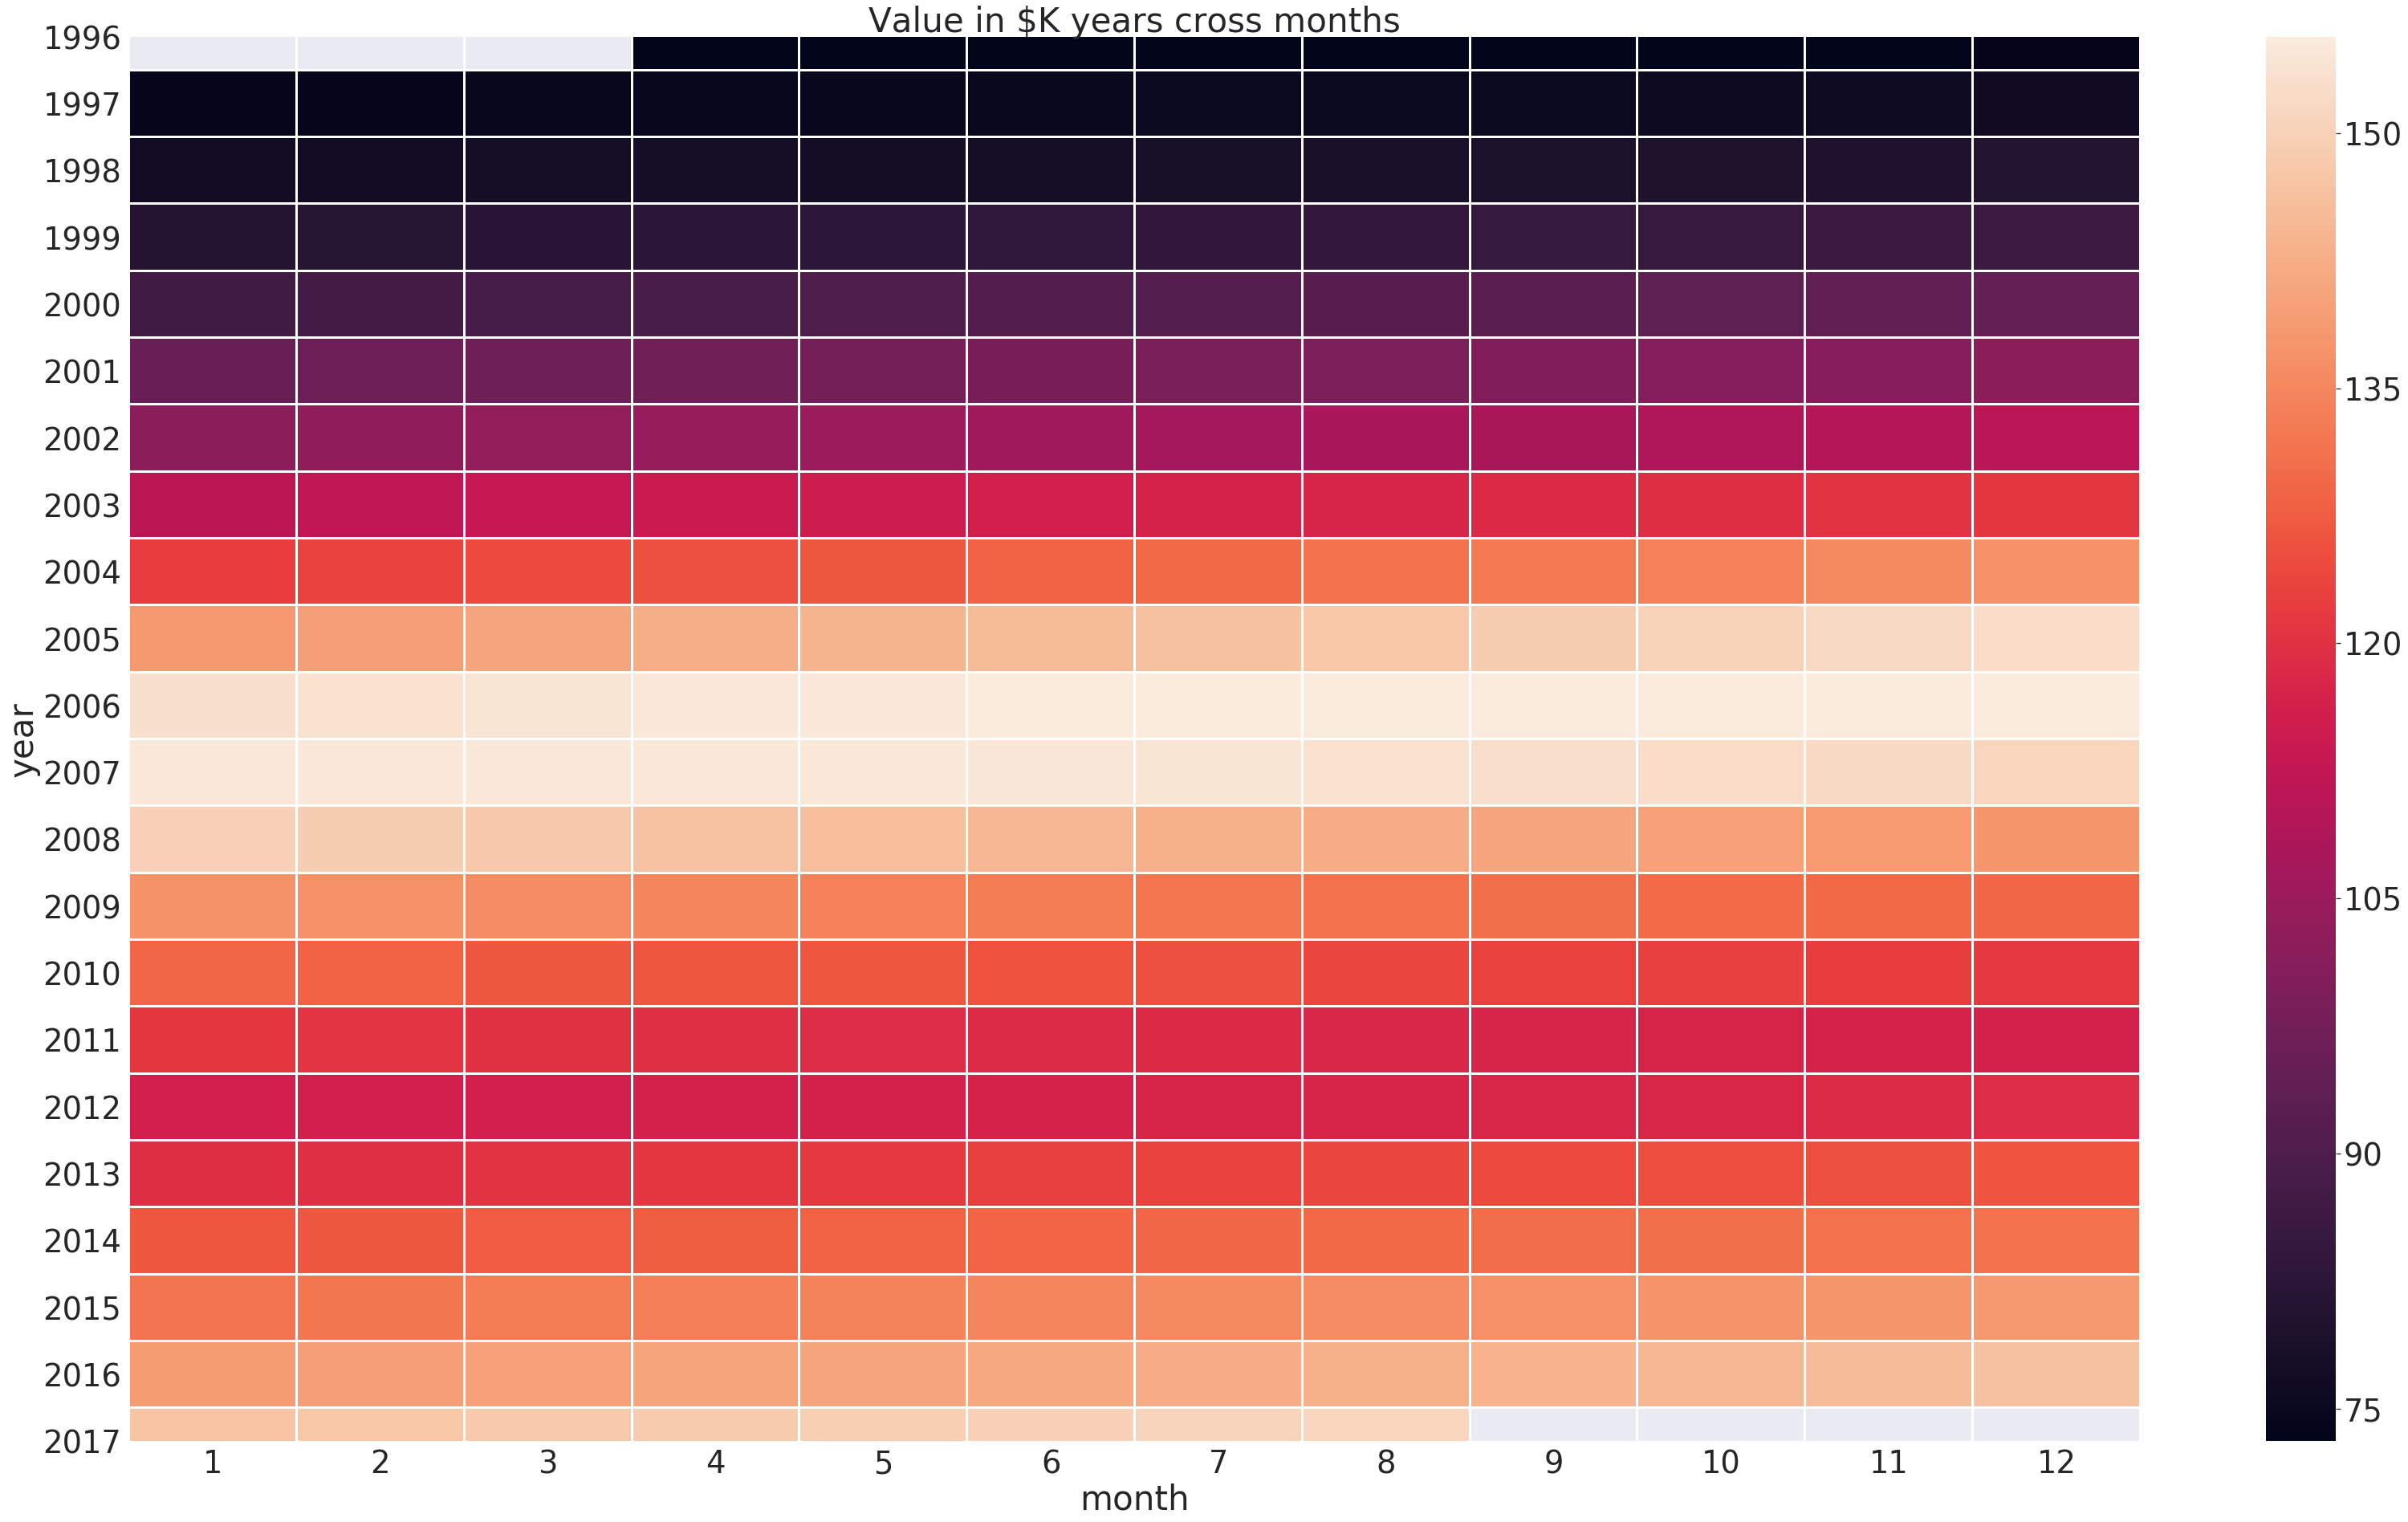

In [31]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group_year_month, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Value in $K years cross months')
plt.show()

In [35]:
data

,Date,RegionName,value for $X1000,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,year,month,day,month_num,weekend,weekday,weekday_num
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,1996,4,30,4,0.0,02 - Tuesday,1
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0,1996,4,30,4,0.0,02 - Tuesday,1
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0,1996,4,30,4,0.0,02 - Tuesday,1
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0,1996,4,30,4,0.0,02 - Tuesday,1
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN,1996,4,30,4,0.0,02 - Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0,2017,8,31,8,0.0,04 - Thursday,3
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3


In [36]:
train_group_month_day = data.groupby(["month", "day"])['value for $X1000'].mean().reset_index()
train_group_month_day = train_group_month_day.pivot('month','day','value for $X1000')
train_group.sort_index(inplace=True)

In [37]:
train_group_month_day

day,28,29,30,31
month,,,,
1,NaN,NaN,NaN,120.748900
2,119.958908,123.651498,NaN,NaN
3,NaN,NaN,NaN,121.134377
4,NaN,NaN,119.638397,NaN
5,NaN,NaN,NaN,119.941629
6,NaN,NaN,120.240793,NaN
7,NaN,NaN,NaN,120.538787
8,NaN,NaN,NaN,120.727665
9,NaN,NaN,119.471711,NaN


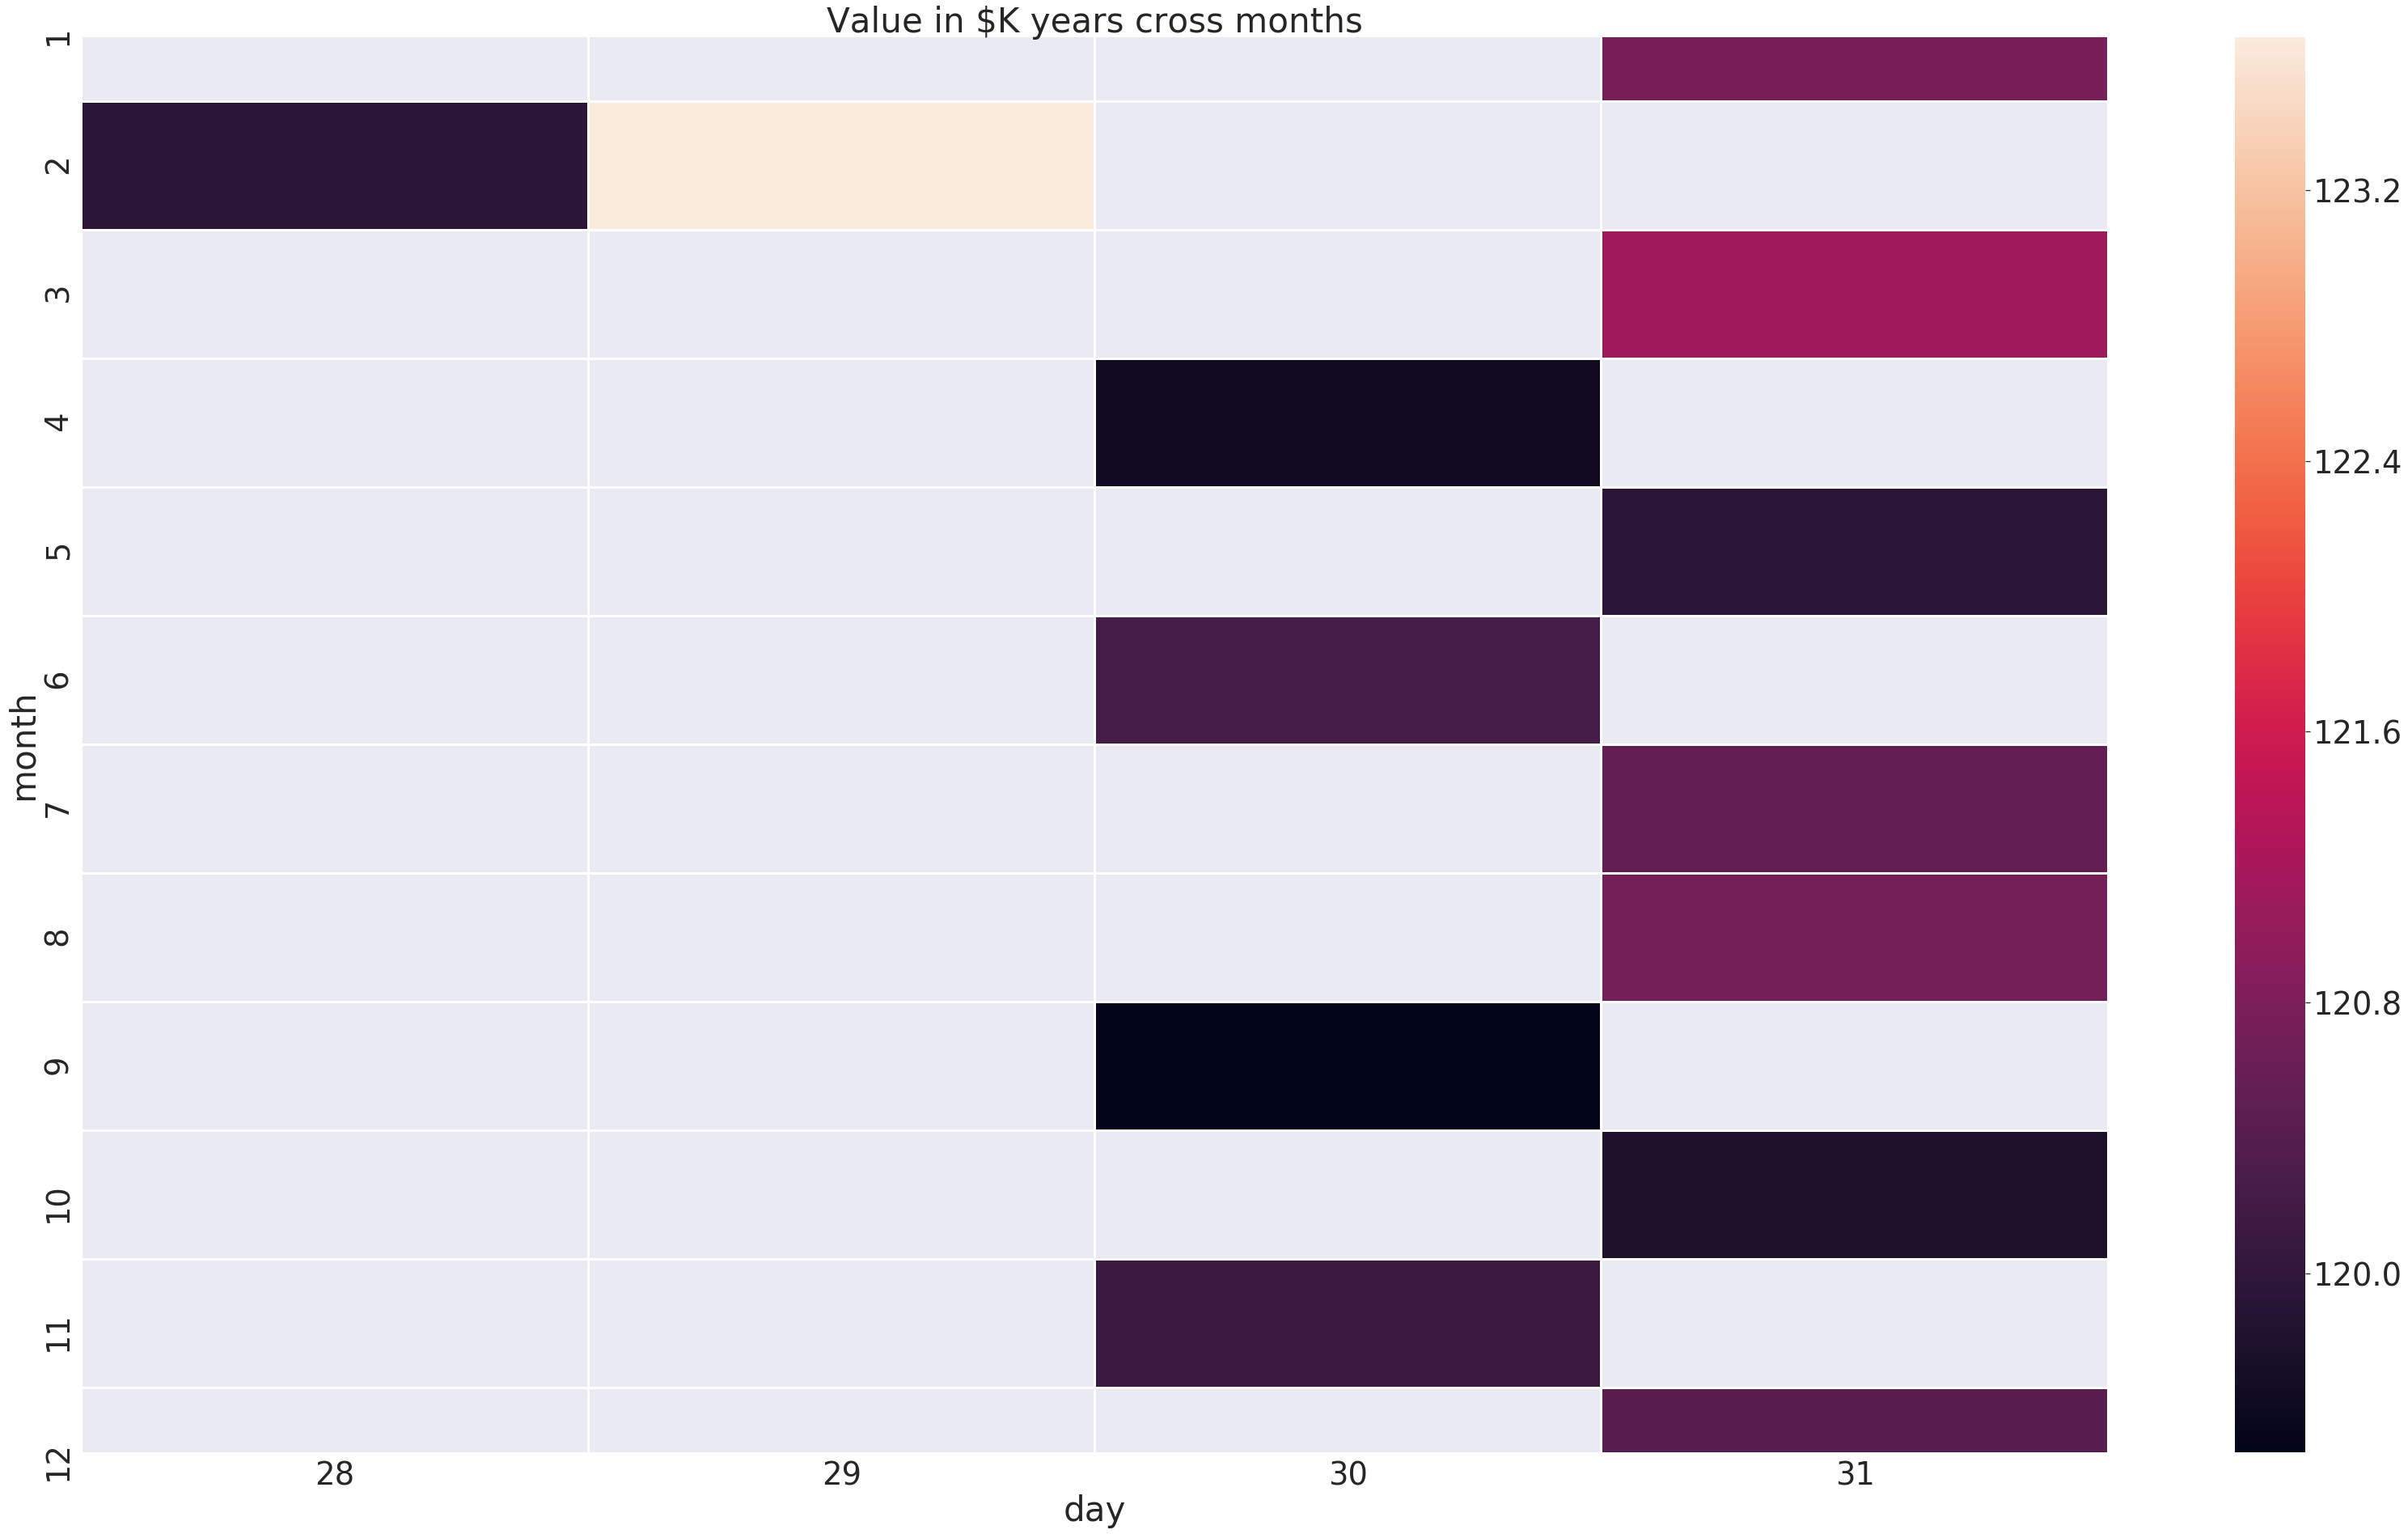

In [38]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group_month_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Value in $K years cross months')
plt.show()

In [39]:
data

,Date,RegionName,value for $X1000,Turnover_AllHomes,ZHVI_3bedroom,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,year,month,day,month_num,weekend,weekday,weekday_num
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,1996,4,30,4,0.0,02 - Tuesday,1
1,1996-04-30,aberdeenharfordmd,76.0,NaN,111700.0,109600.0,81300.0,109600.0,108600.0,147900.0,1996,4,30,4,0.0,02 - Tuesday,1
2,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,44700.0,NaN,44700.0,44700.0,74500.0,1996,4,30,4,0.0,02 - Tuesday,1
3,1996-04-30,aberdeenmoorenc,56.0,NaN,88900.0,NaN,NaN,NaN,87400.0,131000.0,1996,4,30,4,0.0,02 - Tuesday,1
4,1996-04-30,abilenetaylortx,NaN,NaN,66800.0,NaN,NaN,NaN,NaN,NaN,1996,4,30,4,0.0,02 - Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172716,2017-08-31,zirconiahendersonnc,150.0,0.1544,220500.0,228500.0,152600.0,228500.0,228600.0,428100.0,2017,8,31,8,0.0,04 - Thursday,3
4172717,2017-08-31,zolfo_springshardeefl,NaN,4.1096,NaN,67700.0,NaN,67700.0,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172718,2017-08-31,zumbro_fallswabashamn,132.0,0.4515,293500.0,278600.0,154100.0,278600.0,278600.0,NaN,2017,8,31,8,0.0,04 - Thursday,3
4172719,2017-08-31,zumbrotagoodhuemn,NaN,0.2489,NaN,NaN,NaN,NaN,NaN,NaN,2017,8,31,8,0.0,04 - Thursday,3


In [40]:
data = data[["Date", "value for $X1000", "weekday", "year", "month", "day" ]]


In [41]:



data

,Date,value for $X1000,weekday,year,month,day
0,1996-04-30,NaN,02 - Tuesday,1996,4,30
1,1996-04-30,76.0,02 - Tuesday,1996,4,30
2,1996-04-30,NaN,02 - Tuesday,1996,4,30
3,1996-04-30,56.0,02 - Tuesday,1996,4,30
4,1996-04-30,NaN,02 - Tuesday,1996,4,30
...,...,...,...,...,...,...
4172716,2017-08-31,150.0,04 - Thursday,2017,8,31
4172717,2017-08-31,NaN,04 - Thursday,2017,8,31
4172718,2017-08-31,132.0,04 - Thursday,2017,8,31
4172719,2017-08-31,NaN,04 - Thursday,2017,8,31


In [42]:
mean_group = data.groupby(['Date', "weekday", "year", "month", "day"])['value for $X1000'].mean()

In [43]:
import pprint

In [44]:
pp = pprint.PrettyPrinter(width=41, compact=True)
pp.pprint (mean_group)

Date        weekday         year  month  day
1996-04-30  02 - Tuesday    1996  4      30      73.161358
1996-05-31  05 - Friday     1996  5      31      73.114557
1996-06-30  07 - Sunday     1996  6      30      73.079675
1996-07-31  03 - Wednesday  1996  7      31      73.083414
1996-08-31  06 - Saturday   1996  8      31      73.073895
                                                   ...    
2017-04-30  07 - Sunday     2017  4      30     148.888993
2017-05-31  03 - Wednesday  2017  5      31     149.470273
2017-06-30  05 - Friday     2017  6      30     150.011101
2017-07-31  01 - Monday     2017  7      31     150.574882
2017-08-31  04 - Thursday   2017  8      31     151.072060
Name: value for $X1000, Length: 257, dtype: float64


In [45]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['weekday'] = times_series_means['Date'].apply(lambda x: x.weekday())
times_series_means['Date_str'] = times_series_means['Date'].apply(lambda x: str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
times_series_means['day'] = date_staging['day']*1
times_series_means.drop('Date_str',axis = 1, inplace =True)
times_series_means.head()

,Date,weekday,year,month,day,value for $X1000
0,1996-04-30,1,1996,04,30,73.161358
1,1996-05-31,4,1996,05,31,73.114557
2,1996-06-30,6,1996,06,30,73.079675
3,1996-07-31,2,1996,07,31,73.083414
4,1996-08-31,5,1996,08,31,73.073895


In [46]:
times_series_means


,Date,weekday,year,month,day,value for $X1000
0,1996-04-30,1,1996,04,30,73.161358
1,1996-05-31,4,1996,05,31,73.114557
2,1996-06-30,6,1996,06,30,73.079675
3,1996-07-31,2,1996,07,31,73.083414
4,1996-08-31,5,1996,08,31,73.073895
...,...,...,...,...,...,...
252,2017-04-30,6,2017,04,30,148.888993
253,2017-05-31,2,2017,05,31,149.470273
254,2017-06-30,4,2017,06,30,150.011101
255,2017-07-31,0,2017,07,31,150.574882


In [47]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset['value for $X1000'][i] - dataset['value for $X1000'][i - interval]
        diff.append(value)
    return diff
df_count2 = difference(times_series_means)

In [42]:
#df_count2 = pd.DataFrame(df_count2, columns= ['diff'])

In [48]:
df_count3 = times_series_means['value for $X1000'].diff() 

In [49]:
df_count3= df_count3.dropna()

In [50]:
df_count3 = df_count3.rename(columns = 'diff')

In [51]:
df_count3  = df_count3.to_frame('diff')

In [52]:
df_count3

,diff
1,-0.046801
2,-0.034882
3,0.003739
4,-0.009520
5,0.029679
...,...
252,0.555409
253,0.581279
254,0.540828
255,0.563782


In [53]:
times_series_means2 = pd.concat([times_series_means, df_count3], axis  =1).dropna()

In [54]:
times_series_means2.columns

Index(['Date', 'weekday', 'year', 'month', 'day', 'value for $X1000', 'diff'], dtype='object')

In [55]:
times_series_means2

,Date,weekday,year,month,day,value for $X1000,diff
1,1996-05-31,4,1996,05,31,73.114557,-0.046801
2,1996-06-30,6,1996,06,30,73.079675,-0.034882
3,1996-07-31,2,1996,07,31,73.083414,0.003739
4,1996-08-31,5,1996,08,31,73.073895,-0.009520
5,1996-09-30,0,1996,09,30,73.103574,0.029679
...,...,...,...,...,...,...,...
252,2017-04-30,6,2017,04,30,148.888993,0.555409
253,2017-05-31,2,2017,05,31,149.470273,0.581279
254,2017-06-30,4,2017,06,30,150.011101,0.540828
255,2017-07-31,0,2017,07,31,150.574882,0.563782


In [56]:
times_series_means2 = times_series_means2.rename(columns={'value for $X1000': 'Value'})

In [57]:
times_series_means2

,Date,weekday,year,month,day,Value,diff
1,1996-05-31,4,1996,05,31,73.114557,-0.046801
2,1996-06-30,6,1996,06,30,73.079675,-0.034882
3,1996-07-31,2,1996,07,31,73.083414,0.003739
4,1996-08-31,5,1996,08,31,73.073895,-0.009520
5,1996-09-30,0,1996,09,30,73.103574,0.029679
...,...,...,...,...,...,...,...
252,2017-04-30,6,2017,04,30,148.888993,0.555409
253,2017-05-31,2,2017,05,31,149.470273,0.581279
254,2017-06-30,4,2017,06,30,150.011101,0.540828
255,2017-07-31,0,2017,07,31,150.574882,0.563782


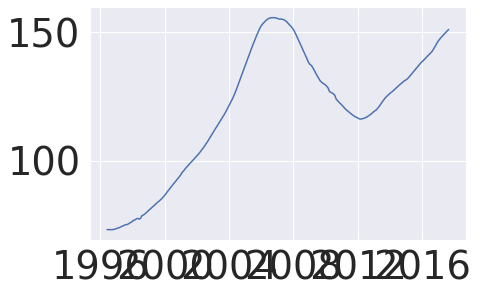

In [58]:
plt.plot(times_series_means2['Date'], times_series_means2['Value'])

In [59]:
from statsmodels.tsa.tsatools import lagmat
times_series_means.reset_index(drop=True,inplace=True)

def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

# def diff_creation(data):
#     data["diff"] = np.nan
#     data.ix[1:, "diff"] = (data.iloc[1:, 1].as_matrix() - data.iloc[:len(data)-1, 1].as_matrix())
#     #data.ix[1:, "diff"] = (data.iloc[1:, 1].as_matrix() - data.iloc[:len(data)-1, 1].as_matrix())
#     return data

# df_count = diff_creation(times_series_means)

In [60]:
times_series_means2 = times_series_means2.dropna()

In [61]:
times_series_means2

,Date,weekday,year,month,day,Value,diff
1,1996-05-31,4,1996,05,31,73.114557,-0.046801
2,1996-06-30,6,1996,06,30,73.079675,-0.034882
3,1996-07-31,2,1996,07,31,73.083414,0.003739
4,1996-08-31,5,1996,08,31,73.073895,-0.009520
5,1996-09-30,0,1996,09,30,73.103574,0.029679
...,...,...,...,...,...,...,...
252,2017-04-30,6,2017,04,30,148.888993,0.555409
253,2017-05-31,2,2017,05,31,149.470273,0.581279
254,2017-06-30,4,2017,06,30,150.011101,0.540828
255,2017-07-31,0,2017,07,31,150.574882,0.563782


In [62]:
# Creation of 7 features with "diff"
lag = 7
lagged2 = lag_func(times_series_means2,lag)
last_date2 = lagged2['Date'].max()

In [63]:
lagged2 = lagged2.dropna()

In [64]:
lagged2


,Date,weekday,year,month,day,Value,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
1,1996-05-31,4,1996,05,31,73.114557,-0.046801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1996-06-30,6,1996,06,30,73.079675,-0.034882,-0.046801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1996-07-31,2,1996,07,31,73.083414,0.003739,-0.034882,-0.046801,0.000000,0.000000,0.000000,0.000000,0.000000
4,1996-08-31,5,1996,08,31,73.073895,-0.009520,0.003739,-0.034882,-0.046801,0.000000,0.000000,0.000000,0.000000
5,1996-09-30,0,1996,09,30,73.103574,0.029679,-0.009520,0.003739,-0.034882,-0.046801,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2017-04-30,6,2017,04,30,148.888993,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131,0.938382,0.856632
253,2017-05-31,2,2017,05,31,149.470273,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131,0.938382
254,2017-06-30,4,2017,06,30,150.011101,0.540828,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131
255,2017-07-31,0,2017,07,31,150.574882,0.563782,0.540828,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826


In [65]:
# Train Test split
def train_test(data_lag):
    xc = ["lag%d" % i for i in range(1,lag+1)] + ['weekday'] + ['day']
    split = 0.70
    xt = data_lag[(lag+1):][xc]
    yt = data_lag[(lag+1):]["diff"]
    isplit = int(len(xt) * split)
    x_train, y_train, x_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]
    return x_train, y_train, x_test, y_test, xt, yt

x_train, y_train, x_test, y_test, xt, yt = train_test(lagged2)

In [66]:
yt

9      0.239739
10     0.066349
11     0.313419
12     0.223192
13     0.218306
         ...   
252    0.555409
253    0.581279
254    0.540828
255    0.563782
256    0.497178
Name: diff, Length: 248, dtype: float64

In [67]:
x_train

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,weekday,day
9,0.180828,0.144740,0.062144,0.029679,-0.009520,0.003739,-0.034882,4,31
10,0.239739,0.180828,0.144740,0.062144,0.029679,-0.009520,0.003739,4,28
11,0.066349,0.239739,0.180828,0.144740,0.062144,0.029679,-0.009520,0,31
12,0.313419,0.066349,0.239739,0.180828,0.144740,0.062144,0.029679,2,30
13,0.223192,0.313419,0.066349,0.239739,0.180828,0.144740,0.062144,5,31
...,...,...,...,...,...,...,...,...,...
177,-0.513984,-0.491701,-0.603463,-0.595658,-1.482852,-0.509845,-0.389019,0,31
178,-0.594651,-0.513984,-0.491701,-0.603463,-0.595658,-1.482852,-0.509845,0,28
179,-0.601209,-0.594651,-0.513984,-0.491701,-0.603463,-0.595658,-1.482852,3,31
180,-0.490460,-0.601209,-0.594651,-0.513984,-0.491701,-0.603463,-0.595658,5,30


In [68]:
y_train

9      0.239739
10     0.066349
11     0.313419
12     0.223192
13     0.218306
         ...   
177   -0.594651
178   -0.601209
179   -0.490460
180   -0.498624
181   -0.445847
Name: diff, Length: 173, dtype: float64

In [69]:
x_test

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,weekday,day
182,-0.445847,-0.498624,-0.490460,-0.601209,-0.594651,-0.513984,-0.491701,3,30
183,-0.396488,-0.445847,-0.498624,-0.490460,-0.601209,-0.594651,-0.513984,6,31
184,-0.429235,-0.396488,-0.445847,-0.498624,-0.490460,-0.601209,-0.594651,2,31
185,-0.436919,-0.429235,-0.396488,-0.445847,-0.498624,-0.490460,-0.601209,4,30
186,-0.389618,-0.436919,-0.429235,-0.396488,-0.445847,-0.498624,-0.490460,0,31
...,...,...,...,...,...,...,...,...,...
252,0.592286,0.623706,0.684663,0.875826,0.947131,0.938382,0.856632,6,30
253,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131,0.938382,2,31
254,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131,4,30
255,0.540828,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826,0,31


In [70]:
y_test

182   -0.396488
183   -0.429235
184   -0.436919
185   -0.389618
186   -0.336190
         ...   
252    0.555409
253    0.581279
254    0.540828
255    0.563782
256    0.497178
Name: diff, Length: 75, dtype: float64

In [73]:

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(x_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [74]:

lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.0784


In [75]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.1320


In [76]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.0959


In [77]:

gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.0873


In [78]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.1384


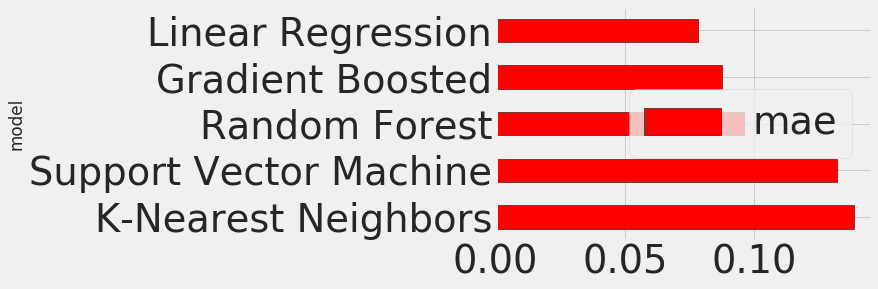

In [80]:
plt.style.use('fivethirtyeight')
#figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
fig = model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')
#fig.set_size_inches(8, 6)
# Plot formatting
#plt.ylabel(''); plt.yticks(size = 8); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
#plt.title('Model Comparison on Test MAE', size = 20);

In [81]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [82]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   23.4s finished


In [84]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(rf_random.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
82,2.239125,0.019835,0.105003,0.001894,1000,5,4,auto,100,True,...,-0.361074,-0.858591,-0.458237,0.292245,1,-0.080234,-0.097484,-0.060440,-0.079386,0.015135
79,0.458202,0.007762,0.023681,0.000385,200,5,4,auto,80,True,...,-0.363645,-0.863346,-0.458588,0.296222,2,-0.080374,-0.097467,-0.060663,-0.079501,0.015038
40,0.455024,0.007178,0.022927,0.000409,200,5,4,auto,10,True,...,-0.363645,-0.863346,-0.458588,0.296222,2,-0.080374,-0.097467,-0.060663,-0.079501,0.015038
93,1.350833,0.035941,0.055721,0.011524,600,2,4,auto,40,True,...,-0.363257,-0.859665,-0.459618,0.292186,4,-0.080257,-0.097355,-0.060293,-0.079302,0.015145
97,0.381683,0.001861,0.023691,0.000296,200,5,4,auto,100,False,...,-0.374292,-0.868247,-0.462992,0.298123,5,-0.067629,-0.093140,-0.064688,-0.075153,0.012776
53,1.852912,0.017118,0.105591,0.001714,1000,5,4,auto,30,False,...,-0.374292,-0.868247,-0.463725,0.297363,6,-0.067629,-0.093140,-0.064688,-0.075153,0.012776
80,3.658414,0.031448,0.208606,0.002401,2000,2,4,auto,60,False,...,-0.374292,-0.868247,-0.463803,0.297282,7,-0.067629,-0.093140,-0.064688,-0.075153,0.012776
3,3.713467,0.031193,0.205274,0.003043,2000,2,4,auto,30,False,...,-0.374292,-0.868247,-0.463803,0.297282,7,-0.067629,-0.093140,-0.064688,-0.075153,0.012776
9,3.380102,0.043439,0.185876,0.004194,1800,5,4,auto,10,False,...,-0.374292,-0.868247,-0.463843,0.297241,9,-0.067629,-0.093140,-0.064688,-0.075153,0.012776
66,3.349486,0.017969,0.188788,0.003658,1800,2,4,auto,10,False,...,-0.374292,-0.868247,-0.463843,0.297241,9,-0.067629,-0.093140,-0.064688,-0.075153,0.012776


In [85]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [86]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [200, 400, 600, 500, 550, 600]}

model = GradientBoostingRegressor(loss = 'lad', max_depth = 60,
                                  min_samples_leaf = 8,
                                  min_samples_split = 5,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [87]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  24 | elapsed:    2.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.1s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=60,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=8,
                                                 min_samples_split=5,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

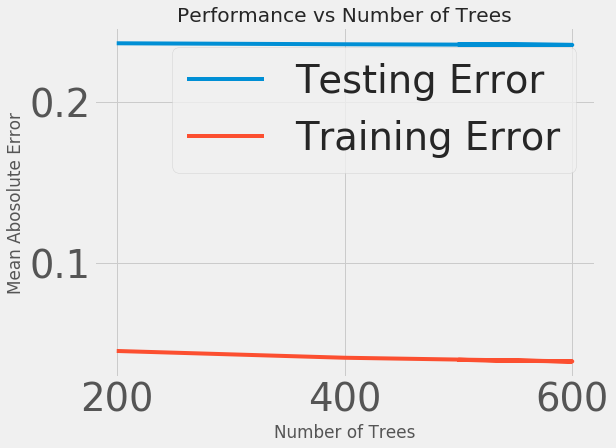

In [243]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
#figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [88]:

# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=60,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
default_model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
%%timeit -n 1 -r 5
final_model.fit(x_train, y_train)

1.92 s ± 16.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [91]:
default_pred = default_model.predict(x_test)
final_pred = final_model.predict(x_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 0.0858.
Final model performance on the test set:   MAE = 0.1055.


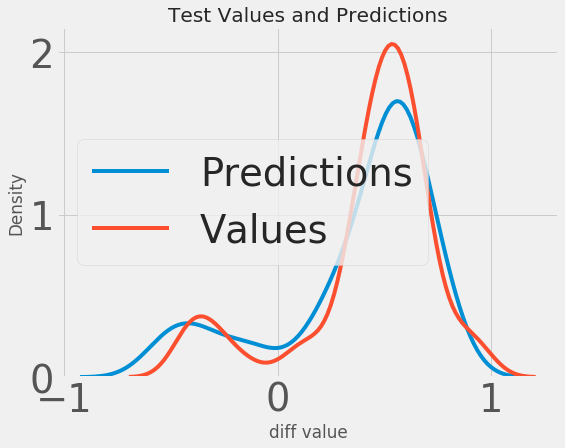

In [248]:
#figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('diff value'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

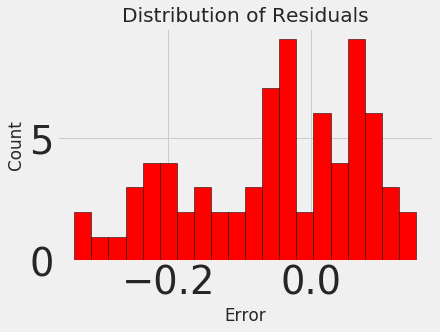

In [92]:
#figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

In [93]:
# Linear Model
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def modelisation(x_tr, y_tr, x_ts, y_ts, xt, yt, model0, model1):
    # Modelisation with all product
    model0.fit(x_tr, y_tr)

    prediction = model0.predict(x_ts)
    r2 = r2_score(y_ts.as_matrix(), prediction)
    mae = mean_absolute_error(y_ts.as_matrix(), prediction)
    print ("-----------------------------------------------")
    print ("mae with 70% of the data to train:", mae)
    print ("-----------------------------------------------")

    # Model with all data
    model1.fit(xt, yt) 
    
    return model1, prediction, model0

#model0 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)
#model1 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)
model0 = final_model
model1 = final_model
# lr = LinearRegression()
# svm = SVR(C = 1000, gamma = 0.1)
# random_forest = RandomForestRegressor(random_state=60                                    
# gradient_boosted = GradientBoostingRegressor(random_state=60)
# knn = KNeighborsRegressor(n_neighbors=10)

clr, prediction, clr0  = modelisation(x_train, y_train, x_test, y_test, xt, yt, model0, model1)

-----------------------------------------------
mae with 70% of the data to train: 0.10550529758517231
-----------------------------------------------


In [94]:
prediction

array([-0.52247238, -0.47110531, -0.58157682, -0.49556965, -0.4830707 ,
       -0.33636712, -0.32950929, -0.38285918, -0.35744681, -0.19776115,
       -0.12625113, -0.1484785 , -0.07409447,  0.08532568,  0.18647776,
        0.42532927,  0.47553865,  0.47119858,  0.41359131,  0.40205127,
        0.2989695 ,  0.26811121,  0.48111641,  0.57057447,  0.56378031,
        0.7442966 ,  0.76084012,  0.79352262,  0.66536053,  0.54399935,
        0.50176625,  0.37093351,  0.22557633,  0.2479927 ,  0.36538358,
        0.50464566,  0.52013924,  0.53746131,  0.57329052,  0.51165104,
        0.386997  ,  0.34924963,  0.31765729,  0.27853124,  0.17047826,
        0.39608442,  0.51938457,  0.56438128,  0.64713037,  0.65841371,
        0.67928947,  0.6651043 ,  0.67048202,  0.66585467,  0.66354542,
        0.59221192,  0.53808998,  0.54469181,  0.54939915,  0.51949241,
        0.56418095,  0.61193351,  0.60524177,  0.63297641,  0.71026104,
        0.76210999,  0.81112283,  0.81917779,  0.7049302 ,  0.64

In [95]:
np.array(y_test)

array([-0.3964879 , -0.4292353 , -0.43691914, -0.38961828, -0.33618962,
       -0.24838893, -0.26029454, -0.32675231, -0.13587837,  0.05467272,
        0.12495271,  0.14585698,  0.2068672 ,  0.31034657,  0.36474024,
        0.33724008,  0.38204159,  0.48771267,  0.45491493,  0.34467114,
        0.35567947,  0.60071739,  0.68462512,  0.72589168,  0.77005095,
        0.76431007,  0.68690467,  0.64508845,  0.55344373,  0.47359431,
        0.43822769,  0.40573848,  0.4289746 ,  0.4533396 ,  0.49303857,
        0.48918156,  0.4985889 ,  0.48372531,  0.4635936 ,  0.4332079 ,
        0.43029163,  0.40122295,  0.35305738,  0.34280339,  0.49830668,
        0.63838194,  0.62916275,  0.60470367,  0.62173095,  0.65174036,
        0.65079962,  0.63687676,  0.62568203,  0.59332079,  0.55465663,
        0.5042333 ,  0.47566872,  0.58533597,  0.5826972 ,  0.51154462,
        0.52716176,  0.51806209,  0.65023518,  0.85663217,  0.93838194,
        0.94713076,  0.87582601,  0.68466317,  0.62370649,  0.59

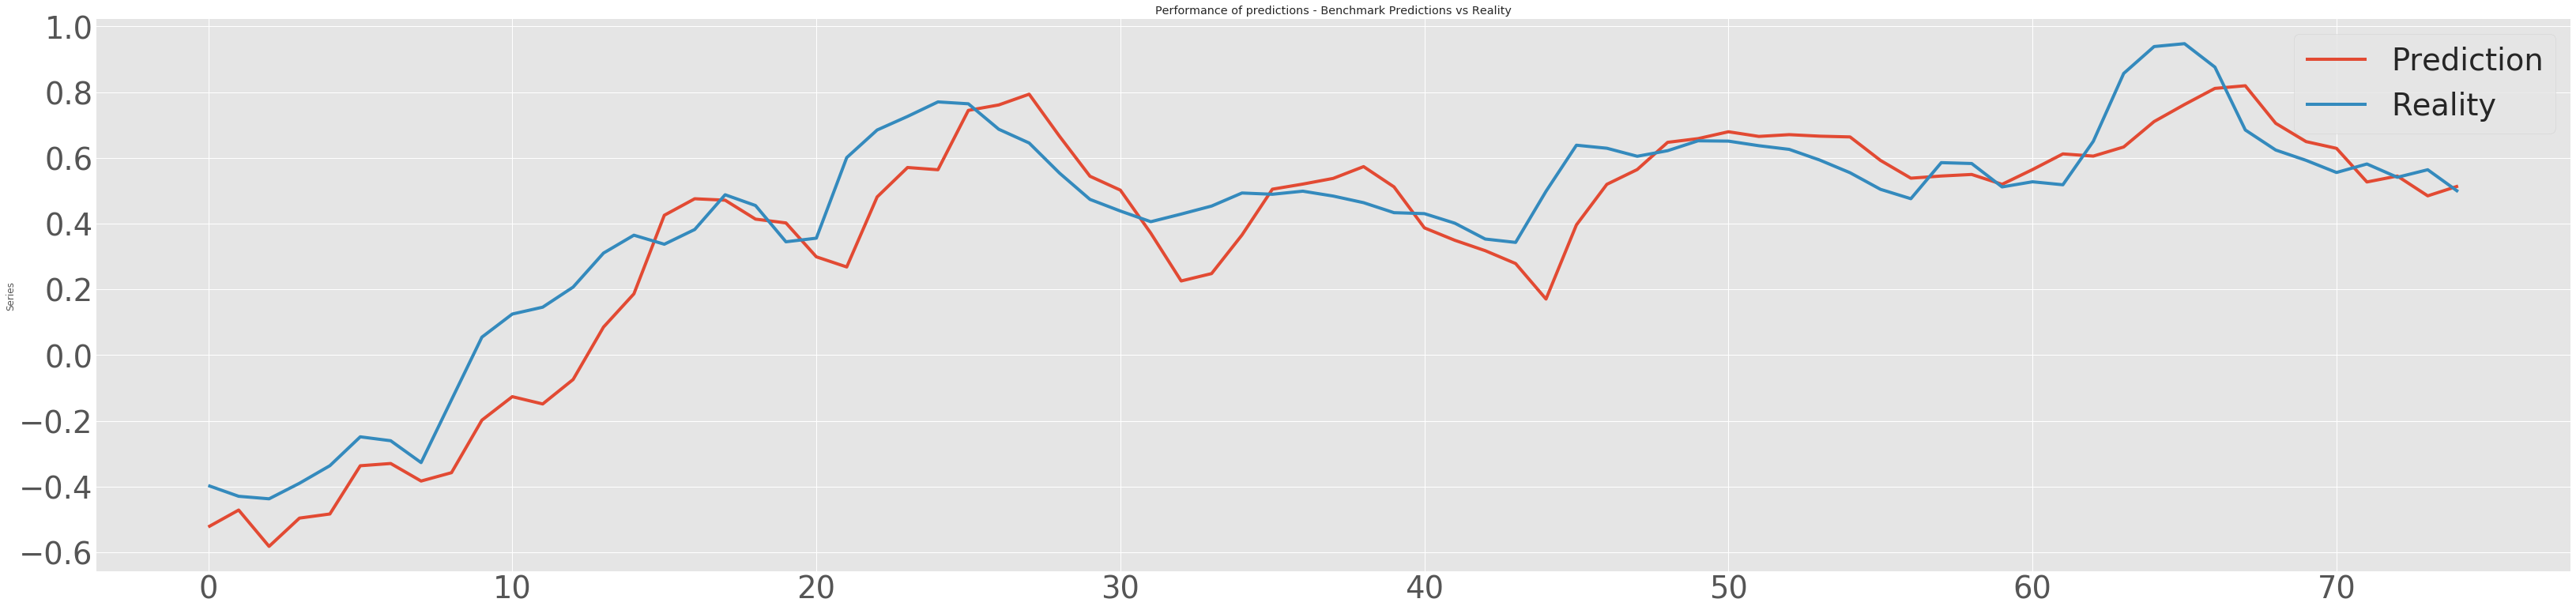

In [96]:

# Performance 1
plt.style.use('ggplot')
plt.figure(figsize=(50, 12))
line_up, = plt.plot(prediction,label='Prediction')
line_down, = plt.plot(np.array(y_test),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality')
plt.show()

In [97]:
import datetime
from dateutil.relativedelta import relativedelta

In [103]:
# Prediction
def pred_df(data,number_of_days):
    data_pred = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + timedelta(days=1)),columns = ["Date"])
    for i in range(number_of_days):
        inter = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + relativedelta(months=1+i)),columns = ["Date"])
        data_pred = pd.concat([data_pred,inter]).reset_index(drop=True)
    return data_pred

data_to_pred = pred_df(times_series_means2,30)

In [104]:
data_to_pred

,Date
0,2017-08-01
1,2017-08-31
2,2017-09-30
3,2017-10-31
4,2017-11-30
5,2017-12-31
6,2018-01-31
7,2018-02-28
8,2018-03-31
9,2018-04-30


In [102]:
lagged2

,Date,weekday,year,month,day,Value,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
1,1996-05-31,4,1996,05,31,73.114557,-0.046801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1996-06-30,6,1996,06,30,73.079675,-0.034882,-0.046801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1996-07-31,2,1996,07,31,73.083414,0.003739,-0.034882,-0.046801,0.000000,0.000000,0.000000,0.000000,0.000000
4,1996-08-31,5,1996,08,31,73.073895,-0.009520,0.003739,-0.034882,-0.046801,0.000000,0.000000,0.000000,0.000000
5,1996-09-30,0,1996,09,30,73.103574,0.029679,-0.009520,0.003739,-0.034882,-0.046801,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2017-04-30,6,2017,04,30,148.888993,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131,0.938382,0.856632
253,2017-05-31,2,2017,05,31,149.470273,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131,0.938382
254,2017-06-30,4,2017,06,30,150.011101,0.540828,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826,0.947131
255,2017-07-31,0,2017,07,31,150.574882,0.563782,0.540828,0.581279,0.555409,0.592286,0.623706,0.684663,0.875826


In [103]:
lagged = lagged.rename(columns = {'value for $X1000' : 'Value'})

In [105]:
def initialisation(data_lag, data_pred, model, xtrain, ytrain, number_of_days):
    # Initialisation
    model.fit(xtrain, ytrain)
    
    for i in range(number_of_days-1):
        lag1 = data_lag.tail(1)["diff"].values[0]
        lag2 = data_lag.tail(1)["lag1"].values[0]
        lag3 = data_lag.tail(1)["lag2"].values[0]
        lag4 = data_lag.tail(1)["lag3"].values[0]
        lag5 = data_lag.tail(1)["lag4"].values[0]
        lag6 = data_lag.tail(1)["lag5"].values[0]
        lag7 = data_lag.tail(1)["lag6"].values[0]
        lag8 = data_lag.tail(1)["lag7"].values[0]
        
        data_pred['weekday'] = data_pred['Date'].apply(lambda x:x.weekday())
        weekday = data_pred['weekday'][0]
        
        row = pd.Series([lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,weekday]
                        ,['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        to_predict = pd.DataFrame(columns = ['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        prediction = pd.DataFrame(columns = ['diff'])
        to_predict = to_predict.append([row])
        #print (to_predict)
        prediction = pd.DataFrame(model.predict(to_predict),columns = ['diff'])

        # Loop
        if i == 0:
            last_predict = data_lag["Value"][data_lag.shape[0]-1] + prediction.values[0][0]

        if i > 0 :
            last_predict = data_lag["Value"][data_lag.shape[0]-1] + prediction.values[0][0]
        
        data_lag = pd.concat([data_lag,prediction.join(data_pred["Date"]).join(to_predict)]).reset_index(drop=True)
        data_lag["Value"][data_lag.shape[0]-1] = last_predict
        print (data_lag)
        
        # test
        data_pred = data_pred[data_pred["Date"]>data_pred["Date"][0]].reset_index(drop=True)
        
    return data_lag

#model_fin = AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)
model_fin= final_model

In [106]:
lagged2 = initialisation(lagged2, data_to_pred, model_fin, xt, yt, 30)

          Date       Value  day      diff      lag1      lag2      lag3  \
0   1996-05-31   73.114557   31 -0.046801  0.000000  0.000000  0.000000   
1   1996-06-30   73.079675   30 -0.034882 -0.046801  0.000000  0.000000   
2   1996-07-31   73.083414   31  0.003739 -0.034882 -0.046801  0.000000   
3   1996-08-31   73.073895   31 -0.009520  0.003739 -0.034882 -0.046801   
4   1996-09-30   73.103574   30  0.029679 -0.009520  0.003739 -0.034882   
..         ...         ...  ...       ...       ...       ...       ...   
252 2017-05-31  149.470273   31  0.581279  0.555409  0.592286  0.623706   
253 2017-06-30  150.011101   30  0.540828  0.581279  0.555409  0.592286   
254 2017-07-31  150.574882   31  0.563782  0.540828  0.581279  0.555409   
255 2017-08-31  151.072060   31  0.497178  0.563782  0.540828  0.581279   
256 2017-08-01  151.088585  NaN  0.513703  0.497178  0.563782  0.540828   

         lag4      lag5      lag6      lag7      lag8 month  weekday  year  
0    0.000000  0.00000

          Date       Value  day      diff      lag1      lag2      lag3  \
0   1996-05-31   73.114557   31 -0.046801  0.000000  0.000000  0.000000   
1   1996-06-30   73.079675   30 -0.034882 -0.046801  0.000000  0.000000   
2   1996-07-31   73.083414   31  0.003739 -0.034882 -0.046801  0.000000   
3   1996-08-31   73.073895   31 -0.009520  0.003739 -0.034882 -0.046801   
4   1996-09-30   73.103574   30  0.029679 -0.009520  0.003739 -0.034882   
..         ...         ...  ...       ...       ...       ...       ...   
261 2017-12-31  153.978161  NaN  0.639671  0.600891  0.568680  0.534786   
262 2018-01-31  154.638025  NaN  0.659865  0.639671  0.600891  0.568680   
263 2018-02-28  155.217439  NaN  0.579414  0.659865  0.639671  0.600891   
264 2018-03-31  155.742800  NaN  0.525361  0.579414  0.659865  0.639671   
265 2018-04-30  156.267072  NaN  0.524272  0.525361  0.579414  0.659865   

         lag4      lag5      lag6      lag7      lag8 month  weekday  year  
0    0.000000  0.00000

          Date       Value  day      diff      lag1      lag2      lag3  \
0   1996-05-31   73.114557   31 -0.046801  0.000000  0.000000  0.000000   
1   1996-06-30   73.079675   30 -0.034882 -0.046801  0.000000  0.000000   
2   1996-07-31   73.083414   31  0.003739 -0.034882 -0.046801  0.000000   
3   1996-08-31   73.073895   31 -0.009520  0.003739 -0.034882 -0.046801   
4   1996-09-30   73.103574   30  0.029679 -0.009520  0.003739 -0.034882   
..         ...         ...  ...       ...       ...       ...       ...   
270 2018-09-30  158.932411  NaN  0.565081  0.532549  0.550750  0.511380   
271 2018-10-31  159.537796  NaN  0.605386  0.565081  0.532549  0.550750   
272 2018-11-30  160.192617  NaN  0.654820  0.605386  0.565081  0.532549   
273 2018-12-31  160.833056  NaN  0.640440  0.654820  0.605386  0.565081   
274 2019-01-31  161.420731  NaN  0.587674  0.640440  0.654820  0.605386   

         lag4      lag5      lag6      lag7      lag8 month  weekday  year  
0    0.000000  0.00000

          Date       Value  day      diff      lag1      lag2      lag3  \
0   1996-05-31   73.114557   31 -0.046801  0.000000  0.000000  0.000000   
1   1996-06-30   73.079675   30 -0.034882 -0.046801  0.000000  0.000000   
2   1996-07-31   73.083414   31  0.003739 -0.034882 -0.046801  0.000000   
3   1996-08-31   73.073895   31 -0.009520  0.003739 -0.034882 -0.046801   
4   1996-09-30   73.103574   30  0.029679 -0.009520  0.003739 -0.034882   
..         ...         ...  ...       ...       ...       ...       ...   
279 2019-06-30  164.014780  NaN  0.537709  0.521420  0.495949  0.513099   
280 2019-07-31  164.548345  NaN  0.533565  0.537709  0.521420  0.495949   
281 2019-08-31  165.110309  NaN  0.561964  0.533565  0.537709  0.521420   
282 2019-09-30  165.706045  NaN  0.595736  0.561964  0.533565  0.537709   
283 2019-10-31  166.370115  NaN  0.664070  0.595736  0.561964  0.533565   

         lag4      lag5      lag6      lag7      lag8 month  weekday  year  
0    0.000000  0.00000

In [107]:
lagged2['Value']


0       73.114557
1       73.079675
2       73.083414
3       73.073895
4       73.103574
          ...    
280    164.548345
281    165.110309
282    165.706045
283    166.370115
284    167.020176
Name: Value, Length: 285, dtype: float64

In [108]:
lagged2['Value']

0       73.114557
1       73.079675
2       73.083414
3       73.073895
4       73.103574
          ...    
280    164.548345
281    165.110309
282    165.706045
283    166.370115
284    167.020176
Name: Value, Length: 285, dtype: float64

In [319]:
lagged2[(lagged2['Date']>='2019-01-30') & (lagged2['Date']<='2019-12-30')]

,Date,Value,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,month,weekday,year
274,2019-01-31,161.420731,NaN,0.587674,0.640440,0.654820,0.605386,0.565081,0.532549,0.550750,0.511380,0.505579,NaN,3.0,NaN
275,2019-02-28,161.946603,NaN,0.525873,0.587674,0.640440,0.654820,0.605386,0.565081,0.532549,0.550750,0.511380,NaN,3.0,NaN
276,2019-03-31,162.459702,NaN,0.513099,0.525873,0.587674,0.640440,0.654820,0.605386,0.565081,0.532549,0.550750,NaN,6.0,NaN
277,2019-04-30,162.955652,NaN,0.495949,0.513099,0.525873,0.587674,0.640440,0.654820,0.605386,0.565081,0.532549,NaN,1.0,NaN
278,2019-05-31,163.477072,NaN,0.521420,0.495949,0.513099,0.525873,0.587674,0.640440,0.654820,0.605386,0.565081,NaN,4.0,NaN
279,2019-06-30,164.014780,NaN,0.537709,0.521420,0.495949,0.513099,0.525873,0.587674,0.640440,0.654820,0.605386,NaN,6.0,NaN
280,2019-07-31,164.548345,NaN,0.533565,0.537709,0.521420,0.495949,0.513099,0.525873,0.587674,0.640440,0.654820,NaN,2.0,NaN
281,2019-08-31,165.110309,NaN,0.561964,0.533565,0.537709,0.521420,0.495949,0.513099,0.525873,0.587674,0.640440,NaN,5.0,NaN
282,2019-09-30,165.706045,NaN,0.595736,0.561964,0.533565,0.537709,0.521420,0.495949,0.513099,0.525873,0.587674,NaN,0.0,NaN
283,2019-10-31,166.370115,NaN,0.664070,0.595736,0.561964,0.533565,0.537709,0.521420,0.495949,0.513099,0.525873,NaN,3.0,NaN


In [109]:
data_to_pred


,Date,weekday
0,2017-08-01,1
1,2017-08-31,3
2,2017-09-30,5
3,2017-10-31,1
4,2017-11-30,3
5,2017-12-31,6
6,2018-01-31,2
7,2018-02-28,2
8,2018-03-31,5
9,2018-04-30,0


Series([], Name: Value, dtype: float64)

In [308]:
lagged2[lagged2['diff']<0]
lagged.ix[(lagged2.Value < 0), 'Value'] = 0

NameError: name 'lagged' is not defined

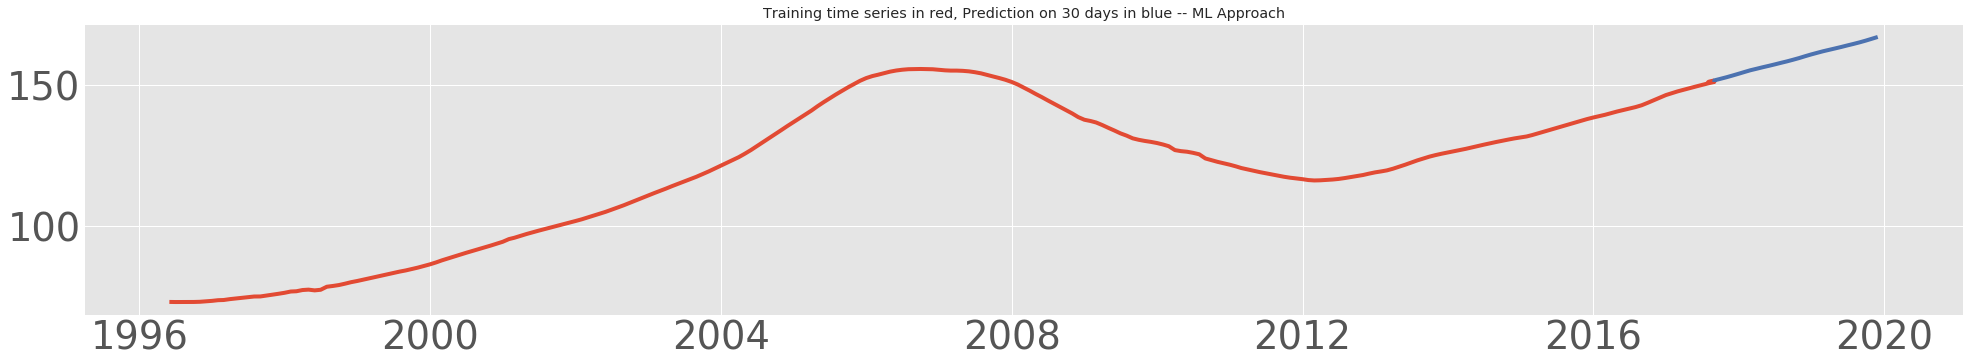

In [110]:
df_lagged = lagged2[['Value','Date']]
df_train = df_lagged[df_lagged['Date'] <= last_date2]
df_pred = df_lagged[df_lagged['Date'] >= last_date2]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train.Date,df_train.Value)
plt.plot(df_pred.Date,df_pred.Value,color='b')
plt.title('Training time series in red, Prediction on 30 days in blue -- ML Approach')
plt.show()


In [ ]:
##trying uploading to simultaneously
##Ahingtrying some changes tpo confirm.